<a href="https://colab.research.google.com/github/marianegri/Python_DataScience_MachineLearning/blob/main/Pre-processamento/Analise_de_componentes_principais_Redu%C3%A7%C3%A3o_da_dimensionalidade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale

np.random.seed(42)

In [12]:
municipios = pd.read_csv('bancoprenatal.csv', sep = ";")

In [13]:
municipios.head()

,prenatal,renda,saneamento,desemprego,analfabet,Gini,fundamental,PIB_per_capita
0,48.30,467.72,0.288858,5.01,12.0,0.5893,37.29,13760.40
1,54.04,672.87,1.174262,4.64,7.9,0.5496,51.30,14315.36
2,40.50,446.58,0.101266,2.49,13.8,0.5166,36.59,15745.16
3,59.42,718.79,40.103242,5.87,8.3,0.5890,48.49,14870.59
4,52.52,553.47,0.093493,5.24,10.4,0.5147,44.23,15997.56


In [15]:
from sklearn.decomposition import PCA

In [16]:
pca = PCA(random_state=42)

In [18]:
minicipios_scaled = scale(municipios.drop(['prenatal'], axis=1))

In [20]:
pd.DataFrame(minicipios_scaled)

,0,1,2,3,4,5,6
0,-0.065648,-0.925414,-0.357553,-0.391244,1.300489,-0.261173,0.068904
1,0.793257,-0.897321,-0.458044,-0.811743,0.701858,1.109958,0.108146
2,-0.154156,-0.931366,-1.041974,-0.206634,0.204256,-0.329680,0.209249
3,0.985511,0.337871,-0.123981,-0.770718,1.295966,0.834949,0.147407
4,0.293363,-0.931613,-0.295086,-0.555341,0.175606,0.418031,0.227096
...,...,...,...,...,...,...,...
5560,0.675233,-0.896408,-0.783958,-0.729694,-0.540640,0.480667,0.059593
5561,0.543812,-0.921077,-0.181016,-0.339963,-0.311442,-0.051735,0.192055
5562,-0.471299,-0.758179,0.497972,0.111304,-0.144066,0.157702,0.186690
5563,-0.472974,-0.917451,-0.982223,0.295913,0.315839,-0.774980,0.581800


In [23]:
pca.fit(minicipios_scaled)

PCA(random_state=42)

In [24]:
print('Autovalores = ', pca.explained_variance_)

Autovalores =  [3.37348941 1.19313218 0.87576566 0.68734261 0.52950922 0.17949657
 0.16252244]


In [27]:
x = np.arange(pca.explained_variance_.shape[0]) + 1

Text(0, 0.5, 'Variância')

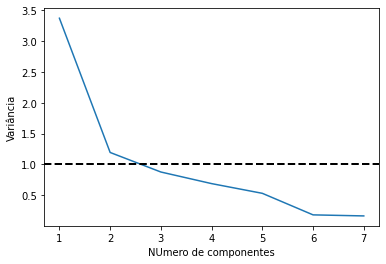

In [29]:
plt.plot(x, pca.explained_variance_)
plt.axhline(1.0, color='black', linestyle='--', linewidth=2)
plt.xlabel('NUmero de componentes')
plt.ylabel('Variância')

Text(0, 0.5, 'Variância')

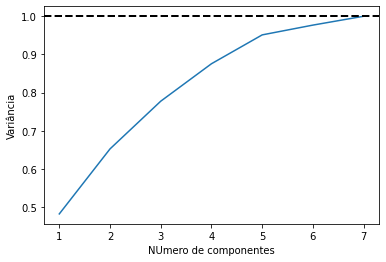

In [31]:
plt.plot(x, np.cumsum(pca.explained_variance_ratio_))
plt.axhline(1.0, color = 'black', linestyle = '--', linewidth = 2)
plt.xlabel('NUmero de componentes')
plt.ylabel('Variância')

In [33]:
pca_fitted = PCA(n_components=2, random_state=42)
new_dataset = pd.DataFrame(pca_fitted.fit_transform(minicipios_scaled))

In [34]:
new_dataset

,0,1
0,-0.490076,-0.165627
1,0.968842,-0.124104
2,-0.196800,-1.134865
3,1.086161,0.759095
4,0.411981,-0.384681
...,...,...
5560,0.949837,-1.064450
5561,0.309610,-0.632137
5562,-0.439939,0.129597
5563,-0.720960,-1.086714


In [35]:
pd.DataFrame(pca_fitted.components_.T * np.sqrt(pca_fitted.explained_variance_),
             columns=['PC1', 'PC2'],
             index=municipios.drop(['prenatal'], axis=1).columns.values)

,PC1,PC2
renda,0.904294,-0.035419
saneamento,0.557631,0.407738
desemprego,-0.347714,0.838828
analfabet,-0.903455,0.044404
Gini,-0.478634,0.448735
fundamental,0.847711,0.313862
PIB_per_capita,0.599960,0.141953
